Home Credit uses various statistical methods and Machine Learning to make credit score predictions. Unlocking the maximum potential of Home Credit Indonesia's data can be done by creating a model that ensures customers who can make repayments are not rejected when applying for loans. Additionally, Home Credit can provide loans with principal, maturity, and repayment calendars that will motivate clients to succeed.

By using the CRISP-DM method, we'll build Logistic Regression, K-Nearest Neighbor (KNN), and Random Forest models and compare which one best predicted the credit score.

1. Business Understanding

● Problem Statement :
A credit score is a number from 300 to 850 that depicts a consumer’s creditworthiness. Creditworthiness is how a lender determines that people will default on their debt obligations or how worthy people are to receive new credit. Creditworthiness is what lenders look at before approving any new credit to prospective borrowers. A credit score plays a key role in a lender’s decision to offer credit. The higher the score, the better a borrower looks to potential lenders. A credit score is based on credit history: number of open accounts, total levels of debt, repayment history, and other factors. Lenders use credit scores to evaluate the probability that an individual will repay loans in a timely manner.

● Business Metric and Objectives :
Factors considered in credit scoring include repayment history, types of loans, length of credit history, and an individual’s total debt. These factors can be used in building a model to predict the capabilities of each applicant in repaying the loan (credit score). Once the credit score prediction model is made, the model is evaluated by the metrics; Accuracy, Precision, Recall, F1-score, and AUC.

● Model Definition :
The model created is to predict credit scores using datasets provided by Home Credit Indonesia consisting of 8 primary data, such as application_train, application_test, bureau, bureau_balance, previous_application, POS_CASH_balance, installments_payments, and credit_card_balance.

2. Data Understanding
Context
In this modeling process, a target variable consisting of numbers 1 and 0 is used, where 1 indicates a client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample and 0 for all other cases.

Content
The datasets used for this modeling process have rows representing a client and columns containing the attributes. The dataset includes information about the clients, their credit information and status. The following are the descriptions of each dataset provided by Home Credit Indonesia.

● application_{train|test}.csv

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).

Static data for all applications. One row represents one loan in our data sample.

● bureau.csv

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).

For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

● bureau_balance.csv

Monthly balances of previous credits in Credit Bureau.

This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

● POS_CASH_balance.csv

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

● credit_card_balance.csv

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.

This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

● previous_application.csv

All previous applications for Home Credit loans of clients who have loans in our sample.

There is one row for each previous application related to loans in our data sample.

● installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

There is a) one row for every payment that was made plus b) one row each for missed payment.

One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

# DATA MERGE

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
#membuat label encoder yang akan digunakan nantinya.
label = LabelEncoder()

In [4]:
#membuka daya
app_train = pd.read_csv('home-credit-default-risk\\application_train.csv')

In [6]:
app_train.shape

(307511, 122)

In [5]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
app_test = pd.read_csv('home-credit-default-risk\\application_test.csv')

In [9]:
app_test.shape

(48744, 121)

In [8]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


cari nilai yang berbeda dari kategorikal features app_train dan app_test

In [10]:
#cari nilai yang berbeda dari kategorikal features app_train dan app_test
for col in app_train.columns[app_train.dtypes == 'object']:
    c_train = set(app_train[col].unique())
    c_test = set(app_test[col].unique())
    diff = c_train - c_test
    if len(diff) > 0:
        print('feature ' + col + ' has different values: ', diff)

feature CODE_GENDER has different values:  {'XNA'}
feature NAME_INCOME_TYPE has different values:  {'Maternity leave'}
feature NAME_FAMILY_STATUS has different values:  {'Unknown'}


In [11]:
app_train['CODE_GENDER'] = app_train['CODE_GENDER'].map(lambda x: x if x != 'XNA' else np.nan)
app_train['NAME_INCOME_TYPE'] = app_train['NAME_INCOME_TYPE'].map(lambda x: x if x != 'Maternity leave' else np.nan)
app_train['NAME_FAMILY_STATUS'] = app_train['NAME_FAMILY_STATUS'].map(lambda x: x if x != 'Unknown' else np.nan)

In [12]:
for col in app_train.columns[app_train.dtypes == 'object']:
    d = app_train[col].value_counts()
    if app_train[col].nunique() == 2:
        d[0] = 0
        d[1] = 1      
    app_train[col] = app_train[col].map(d)
    app_test[col] = app_test[col].map(d)

In [13]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1.0,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0.0,0,1,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1.0,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0.0,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1.0,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,0,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,0,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,0,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,1,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
bureau = pd.read_csv('home-credit-default-risk\\bureau.csv')
bureau_balance = pd.read_csv('home-credit-default-risk\\bureau_balance.csv')

In [17]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [19]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [20]:
#labeling kategorikal values
for col in bureau.columns[bureau.dtypes=='object']:
    bureau[col] = label.fit_transform(bureau[col])

In [21]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,2,0,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,3,-131,NaN
1,215354,5714463,0,0,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,4,-20,NaN
2,215354,5714464,0,0,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,3,-16,NaN
3,215354,5714465,0,0,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,4,-16,NaN
4,215354,5714466,0,0,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,3,-21,NaN


In [22]:
#one hot encoding kategorikal values
for val in bureau_balance['STATUS'].unique():
    bureau_balance['STATUS_' + val] = (bureau_balance['STATUS'] == val).map(int)

bureau_balance.drop(columns=['STATUS'], inplace = True)
bureau_balance.head() 

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_C,STATUS_0,STATUS_X,STATUS_1,STATUS_2,STATUS_3,STATUS_5,STATUS_4
0,5715448,0,1,0,0,0,0,0,0,0
1,5715448,-1,1,0,0,0,0,0,0,0
2,5715448,-2,1,0,0,0,0,0,0,0
3,5715448,-3,1,0,0,0,0,0,0,0
4,5715448,-4,1,0,0,0,0,0,0,0


In [23]:
for col in bureau_balance.drop(columns=['SK_ID_BUREAU']).columns:
    res = bureau_balance.groupby(by = 'SK_ID_BUREAU')[col].mean()
    bureau['Balance_' + str(col)] = bureau['SK_ID_BUREAU'].map(lambda x: res[x] if x in res.index else np.nan)

In [24]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_ANNUITY,Balance_MONTHS_BALANCE,Balance_STATUS_C,Balance_STATUS_0,Balance_STATUS_X,Balance_STATUS_1,Balance_STATUS_2,Balance_STATUS_3,Balance_STATUS_5,Balance_STATUS_4
0,215354,5714462,2,0,-497,0,-153.0,-153.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,0,0,-208,0,1075.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,0,0,-203,0,528.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,0,0,-203,0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,0,0,-629,0,1197.0,NaN,77674.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
bureau.shape

(1716428, 26)

installments_payments, credit_card_balance, POS_CASH_balance -> previous_application.

In [27]:
#Installments Payments
install_pay = pd.read_csv('home-credit-default-risk\\installments_payments.csv')

In [28]:
install_pay.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [29]:
#credit card balance
credit_card = pd.read_csv('home-credit-default-risk\\credit_card_balance.csv')

In [30]:
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [31]:
#labeling
credit_card['NAME_CONTRACT_STATUS'] = label.fit_transform(credit_card['NAME_CONTRACT_STATUS'])

In [32]:
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,0,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,0,0,0


In [33]:
#pos_cash_balance
pos_cash_balance = pd.read_csv('home-credit-default-risk\\POS_CASH_balance.csv')

In [34]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [35]:
#labeling
pos_cash_balance['NAME_CONTRACT_STATUS'] = label.fit_transform(pos_cash_balance['NAME_CONTRACT_STATUS'])

In [36]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,0,0,0
1,1715348,367990,-33,36.0,35.0,0,0,0
2,1784872,397406,-32,12.0,9.0,0,0,0
3,1903291,269225,-35,48.0,42.0,0,0,0
4,2341044,334279,-35,36.0,35.0,0,0,0


In [42]:
#previous application
prev_app = pd.read_csv('home-credit-default-risk\\previous_application.csv')

In [43]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#labeling
for col in prev_app.columns[prev_app.dtypes == 'object']:
    if prev_app[col].nunique() == 2:
        d = prev_app[col].value_counts()
        prev_app[col] = prev_app[col].map({d[0]: 0, d[1]: 1})
    else:        
        for val in prev_app[col].unique():
            prev_app[str(col) + '_' + str(val)] = (prev_app[col] == val).map(int)
        prev_app.drop(columns=col, inplace = True)

In [45]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_POS others without interest,PRODUCT_COMBINATION_nan
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,NaN,1,...,0,0,0,0,0,0,0,0,0,0
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,NaN,1,...,0,0,0,0,0,0,0,0,0,0
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,NaN,1,...,0,0,0,0,0,0,0,0,0,0
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,NaN,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#gabungin install_pay dan prev_app
for col in install_pay.drop(columns=['SK_ID_PREV', 'SK_ID_CURR']).columns:
    res = install_pay.groupby(by = 'SK_ID_PREV')[col].mean()
    prev_app['IP_' + col] = prev_app['SK_ID_PREV'].map(lambda x: res[x] if x in res.index else np.nan)

In [48]:
prev_app.shape

(1670214, 171)

In [49]:
#gabungin prev app dan credit_card
for col in credit_card.drop(columns=['SK_ID_PREV', 'SK_ID_CURR']).columns:
    res = credit_card.groupby(by = 'SK_ID_PREV')[col].mean()
    prev_app['CCB_' + col] = prev_app['SK_ID_PREV'].map(lambda x: res[x] if x in res.index else np.nan)

In [50]:
prev_app.shape

(1670214, 192)

In [51]:
#gabungin pos_cah dengan prev app
for col in pos_cash_balance.drop(columns=['SK_ID_PREV', 'SK_ID_CURR']).columns:
    res = pos_cash_balance.groupby(by = 'SK_ID_PREV')[col].mean()
    prev_app['POS_' + col] = prev_app['SK_ID_PREV'].map(lambda x: res[x] if x in res.index else np.nan)

In [52]:
prev_app.shape

(1670214, 198)

In [53]:
prev_app_merged = prev_app.copy()
bureau_merged = bureau.copy()

In [54]:
for col in bureau_merged.drop(columns = ['SK_ID_CURR', 'SK_ID_BUREAU']).columns:
    res = bureau_merged.groupby(by = 'SK_ID_CURR')[col].mean()
    app_train['Bureau_' + str(col)] = bureau_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)
    app_test['Bureau_' + str(col)] = bureau_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)

In [59]:
app_train.shape

app_test.shape

(48744, 341)

In [108]:
for col in prev_app_merged.drop(columns=['SK_ID_CURR', 'SK_ID_PREV']).columns:
    res = prev_app_merged.groupby(by = 'SK_ID_CURR')[col].mean()
    app_train['Prev_' + str(col)] = prev_app_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)
    app_test['Prev_' + str(col)] = prev_app_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)

In [109]:
app_train.shape

app_test.shape

(48744, 341)

In [110]:
app_train.to_csv('home-credit-default-risk\\train_fix.csv')
app_test.to_csv('home-credit-default-risk\\test_fix.csv')

# Data Prepocessing

In [111]:
#buat fungsi untuk reduce memory.
#intinya adalah iterasi keseluruh kolom pada dataframe dan mengubah datatype yg memorynya paling kecil.
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

#fungsi untuk memanggil dataframe
def import_data(file):
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [149]:
df_train = import_data('home-credit-default-risk\\train_fix.csv')

Memory usage of dataframe is 804.72 MB
Memory usage after optimization is: 218.78 MB
Decreased by 72.8%


In [150]:
df_test = import_data('home-credit-default-risk\\test_fix.csv')

Memory usage of dataframe is 127.19 MB
Memory usage after optimization is: 34.49 MB
Decreased by 72.9%


In [151]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 343 entries, Unnamed: 0 to Prev_POS_SK_DPD_DEF
dtypes: float16(253), float32(40), float64(1), int16(2), int32(7), int8(40)
memory usage: 218.8 MB


In [152]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 342 entries, Unnamed: 0 to Prev_POS_SK_DPD_DEF
dtypes: float16(253), float32(37), float64(1), int16(2), int32(9), int8(40)
memory usage: 34.5 MB


In [192]:
#gabungkan df_train dan df_test
import pandas as pd
data = pd.concat([df_train, df_test], ignore_index=True)
data.drop(columns=['Unnamed: 0'], inplace=True)
# data = df_train.append(df_test, ignore_index=True)

In [193]:
data.shape

(356255, 342)

In [194]:
#Karena di df_test tidak ada di feature target maka nilainya Nan semua.
data['TARGET'][307511:]

307511   NaN
307512   NaN
307513   NaN
307514   NaN
307515   NaN
          ..
356250   NaN
356251   NaN
356252   NaN
356253   NaN
356254   NaN
Name: TARGET, Length: 48744, dtype: float64

In [195]:
#hapus kolom target
data_2 = data.drop(columns=['TARGET'])
data_2.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,Prev_CCB_CNT_INSTALMENT_MATURE_CUM,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF
0,100002,0,1.0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,-8.250000,8.085938,6.500000,1.786133,0.000000,0.000000
1,100003,0,0.0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,6.667969,0.064514,0.0,0.0,-19.000000,17.625000,14.500000,0.656250,0.000000,0.000000
2,100004,1,1.0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,12.781250,0.000000,0.0,0.0,-43.500000,8.500000,4.917969,0.333252,0.000000,0.000000
3,100006,0,0.0,0,0,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,-33.406250,12.398438,6.796875,0.456787,0.000000,0.000000
4,100007,0,1.0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,3.599609,0.000000,0.0,0.0,-26.421875,11.335938,8.109375,0.461182,0.126953,0.126953


In [196]:
#Persentase total data yang missing dari data
sum(data_2.isna().sum())/(data_2.shape[0]*data_2.shape[1])*100

15.289576220795748

In [197]:
#10 besar feature yang memiliki persentase data missing yang paling tinggi.
data_missing = pd.DataFrame(data_2.isnull().sum() / len(data_2)).sort_values(by=0, ascending=False)
data_missing[:10]

,0
Prev_FLAG_LAST_APPL_PER_CONTRACT,1.000000
Prev_RATE_INTEREST_PRIVILEGED,0.981937
Prev_RATE_INTEREST_PRIMARY,0.981937
Prev_CCB_AMT_PAYMENT_CURRENT,0.740916
Prev_CCB_CNT_DRAWINGS_POS_CURRENT,0.740781
Prev_CCB_AMT_DRAWINGS_OTHER_CURRENT,0.740781
Prev_CCB_AMT_DRAWINGS_ATM_CURRENT,0.740781
Prev_CCB_AMT_DRAWINGS_POS_CURRENT,0.740781
Prev_CCB_CNT_DRAWINGS_ATM_CURRENT,0.740781
Prev_CCB_CNT_DRAWINGS_OTHER_CURRENT,0.740781


In [198]:
#kolom yang memiliki persentase data missing diatas 70% akan saya drop.
drop = data_missing[data_missing[0] > 0.7]
drop

,0
Prev_FLAG_LAST_APPL_PER_CONTRACT,1.000000
Prev_RATE_INTEREST_PRIVILEGED,0.981937
Prev_RATE_INTEREST_PRIMARY,0.981937
Prev_CCB_AMT_PAYMENT_CURRENT,0.740916
Prev_CCB_CNT_DRAWINGS_POS_CURRENT,0.740781
Prev_CCB_AMT_DRAWINGS_OTHER_CURRENT,0.740781
Prev_CCB_AMT_DRAWINGS_ATM_CURRENT,0.740781
Prev_CCB_AMT_DRAWINGS_POS_CURRENT,0.740781
Prev_CCB_CNT_DRAWINGS_ATM_CURRENT,0.740781
Prev_CCB_CNT_DRAWINGS_OTHER_CURRENT,0.740781


In [199]:
data_2.drop(columns=drop.index, inplace=True)
data_2.shape

(356255, 331)

In [200]:
#sisanya akan saya isi dengan median.
for feature in  data_missing[(data_missing[0] > 0) & (data_missing[0] <= 0.7)].index:
    data_2[feature] = data_2[feature].fillna(data_2[feature].median())

In [201]:
#cek lagi
sum(data_2.isna().sum())/(data_2.shape[0]*data_2.shape[1])*100

0.0

In [202]:
data_2.shape

(356255, 331)

In [237]:
small_variance = data_2.columns[(data_2.std(axis = 0) < 0.1).values]

In [238]:
small_variance

Index(['CODE_GENDER', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       ...
       'Prev_CCB_AMT_INST_MIN_REGULARITY', 'Prev_CCB_CNT_DRAWINGS_CURRENT',
       'Prev_CCB_CNT_INSTALMENT_MATURE_CUM', 'Prev_CCB_SK_DPD',
       'Prev_CCB_SK_DPD_DEF', 'Prev_POS_MONTHS_BALANCE',
       'Prev_POS_CNT_INSTALMENT', 'Prev_POS_CNT_INSTALMENT_FUTURE',
       'Prev_POS_NAME_CONTRACT_STATUS', 'Prev_POS_SK_DPD'],
      dtype='object', length=224)

In [167]:
# data_2.drop(columns = small_variance, inplace=True)

In [211]:
data_2.shape

(356255, 331)

In [212]:
data_2['TARGET'] = data['TARGET']

In [213]:
data_2.shape

(356255, 332)

In [214]:
data_2['TARGET']

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
356250    NaN
356251    NaN
356252    NaN
356253    NaN
356254    NaN
Name: TARGET, Length: 356255, dtype: float64

In [215]:
data_final = data_2.copy()

In [216]:
data_final.to_csv('data_final.csv')

# DATA VISUALIZATION

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
#buat fungsi untuk reduce memory.
#intinya adalah iterasi keseluruh kolom pada dataframe dan mengubah datatype yg memorynya paling kecil.
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

#fungsi untuk memanggil dataframe
def import_data(file):
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
data = import_data('data_final.csv')

Memory usage of dataframe is 905.10 MB
Memory usage after optimization is: 242.24 MB
Decreased by 73.2%


In [5]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF,TARGET
0,100002,0,1.0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0.000000,0.0,0.0,-8.250000,8.085938,6.500000,1.786133,0.000000,0.000000,1.0
1,100003,0,0.0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0.064514,0.0,0.0,-19.000000,17.625000,14.500000,0.656250,0.000000,0.000000,0.0
2,100004,1,1.0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,0.000000,0.0,0.0,-43.500000,8.500000,4.917969,0.333252,0.000000,0.000000,0.0
3,100006,0,0.0,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.000000,0.0,0.0,-33.406250,12.398438,6.796875,0.456787,0.000000,0.000000,0.0
4,100007,0,1.0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,0.000000,0.0,0.0,-26.421875,11.335938,8.109375,0.461182,0.126953,0.126953,0.0


In [7]:
#split ke data training dan testing
#karena yang akan divisualisasi hanya data training
data_train = data[:307511]

In [8]:
data_train.shape

(307511, 332)

In [9]:
data_test = data[307511:]

In [10]:
data_test.shape

(48744, 332)

In [11]:
data_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF,TARGET
0,100002,0,1.0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0.000000,0.0,0.0,-8.250000,8.085938,6.500000,1.786133,0.000000,0.000000,1.0
1,100003,0,0.0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0.064514,0.0,0.0,-19.000000,17.625000,14.500000,0.656250,0.000000,0.000000,0.0
2,100004,1,1.0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,0.000000,0.0,0.0,-43.500000,8.500000,4.917969,0.333252,0.000000,0.000000,0.0
3,100006,0,0.0,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.000000,0.0,0.0,-33.406250,12.398438,6.796875,0.456787,0.000000,0.000000,0.0
4,100007,0,1.0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,0.000000,0.0,0.0,-26.421875,11.335938,8.109375,0.461182,0.126953,0.126953,0.0


In [12]:
for columns in data_train.columns:
    print(columns)

SK_ID_CURR
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_M

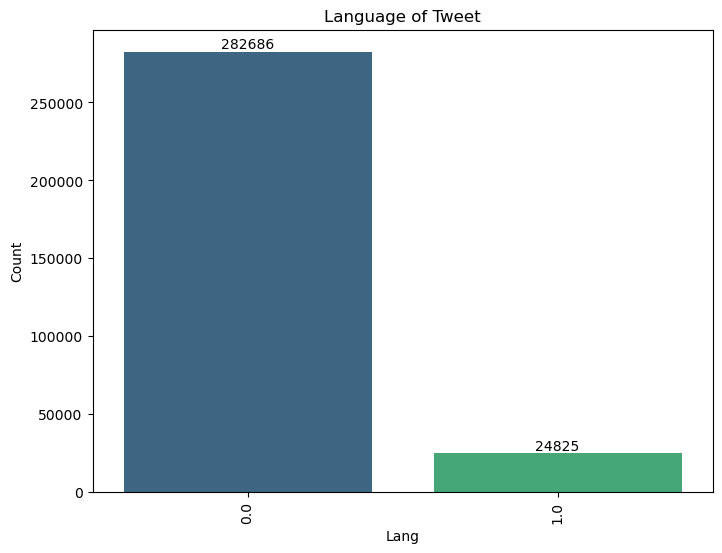

In [22]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(data_train['TARGET']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display count values on top of each bar
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Total of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

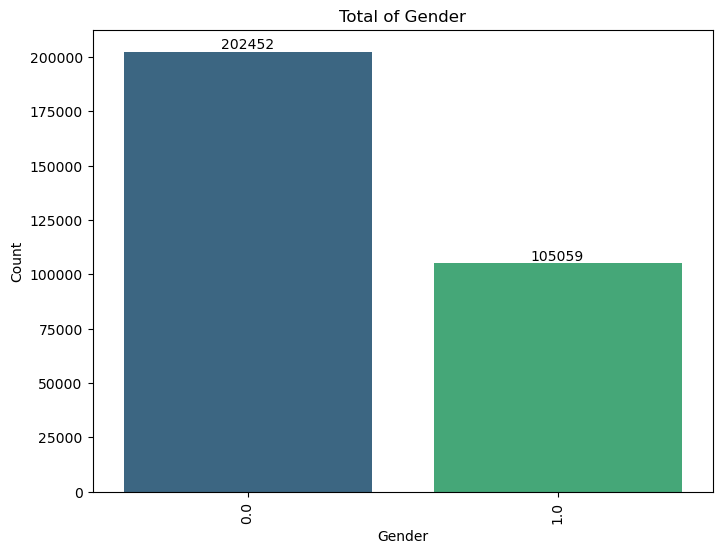

In [24]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(data_train['CODE_GENDER']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display count values on top of each bar
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Total of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

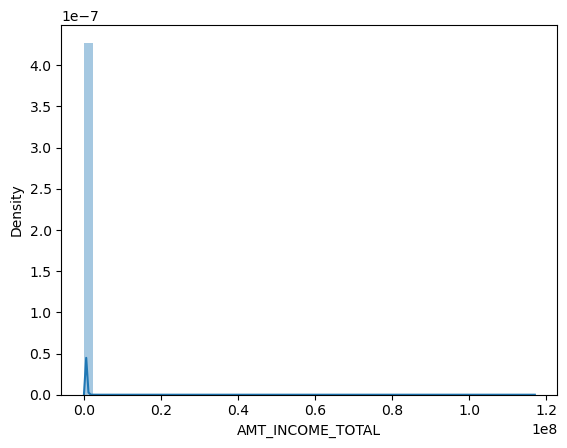

In [26]:
sns.distplot(data_train['AMT_INCOME_TOTAL'])

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

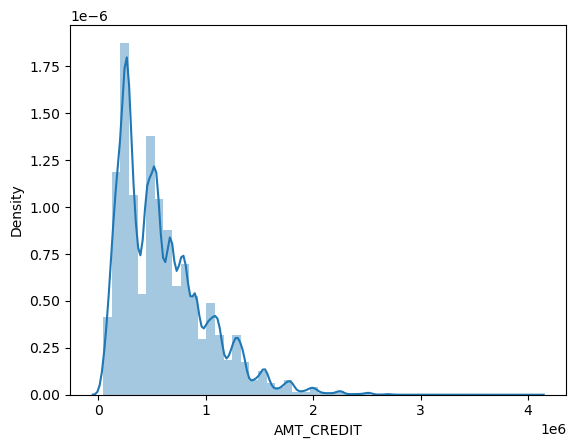

In [27]:
sns.distplot(data_train['AMT_CREDIT'])

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

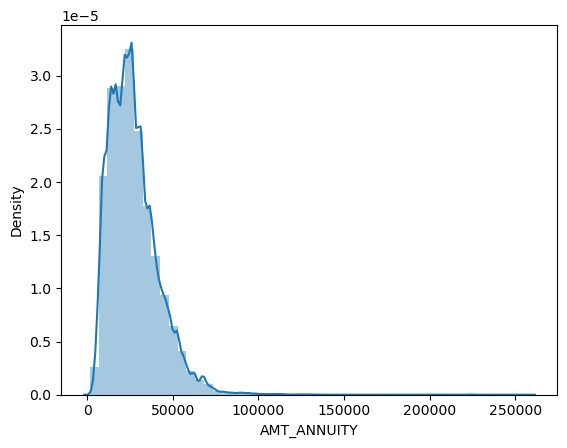

In [28]:
sns.distplot(data_train['AMT_ANNUITY'])

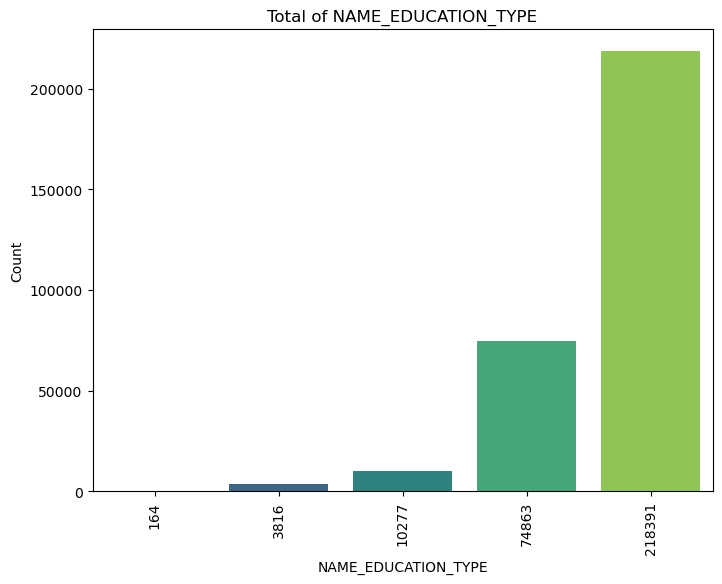

In [35]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(data_train['NAME_EDUCATION_TYPE']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display count values on top of each bar
# for i, count in enumerate(sentiment_counts.values):
#     ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Total of NAME_EDUCATION_TYPE')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Count')
plt.show()

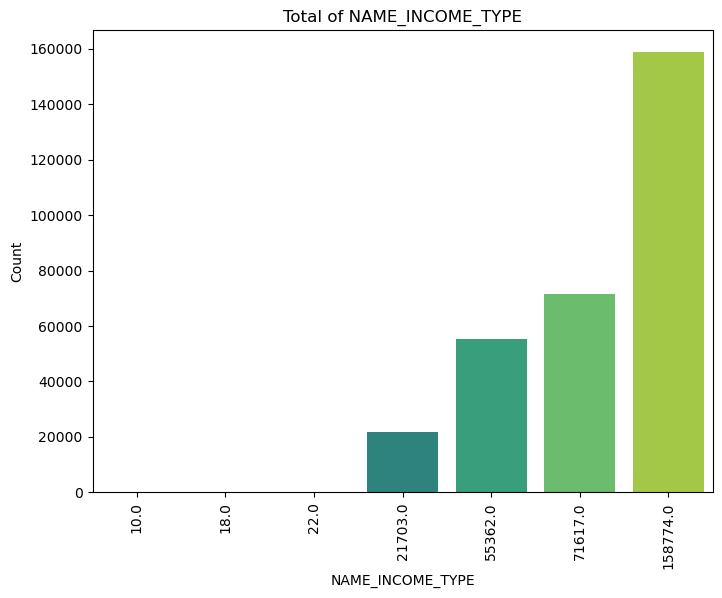

In [34]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(data_train['NAME_INCOME_TYPE']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display count values on top of each bar
# for i, count in enumerate(sentiment_counts.values):
#     ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Total of NAME_INCOME_TYPE')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Count')
plt.show()

# DATA MODELING

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

d:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
data = import_data('home-credit-default-risk//data_final.csv')

Memory usage of dataframe is 905.10 MB
Memory usage after optimization is: 242.24 MB
Decreased by 73.2%


In [7]:
data.head()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF,TARGET
0,0,100002,0,1.0,0,0,0,202500.0,406597.5,24700.5,...,0.000000,0.0,0.0,-8.250000,8.085938,6.500000,1.786133,0.000000,0.000000,1.0
1,1,100003,0,0.0,0,1,0,270000.0,1293502.5,35698.5,...,0.064514,0.0,0.0,-19.000000,17.625000,14.500000,0.656250,0.000000,0.000000,0.0
2,2,100004,1,1.0,1,0,0,67500.0,135000.0,6750.0,...,0.000000,0.0,0.0,-43.500000,8.500000,4.917969,0.333252,0.000000,0.000000,0.0
3,3,100006,0,0.0,0,0,0,135000.0,312682.5,29686.5,...,0.000000,0.0,0.0,-33.406250,12.398438,6.796875,0.456787,0.000000,0.000000,0.0
4,4,100007,0,1.0,0,0,0,121500.0,513000.0,21865.5,...,0.000000,0.0,0.0,-26.421875,11.335938,8.109375,0.461182,0.126953,0.126953,0.0


In [8]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF,TARGET
0,100002,0,1.0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0.000000,0.0,0.0,-8.250000,8.085938,6.500000,1.786133,0.000000,0.000000,1.0
1,100003,0,0.0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0.064514,0.0,0.0,-19.000000,17.625000,14.500000,0.656250,0.000000,0.000000,0.0
2,100004,1,1.0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,0.000000,0.0,0.0,-43.500000,8.500000,4.917969,0.333252,0.000000,0.000000,0.0
3,100006,0,0.0,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.000000,0.0,0.0,-33.406250,12.398438,6.796875,0.456787,0.000000,0.000000,0.0
4,100007,0,1.0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,0.000000,0.0,0.0,-26.421875,11.335938,8.109375,0.461182,0.126953,0.126953,0.0


In [10]:

#split ke data training dan testing
data_train = data[:307511]
data_test = data[307511:]

In [11]:
data_train.shape

(307511, 332)

In [12]:
data_test.shape

(48744, 332)

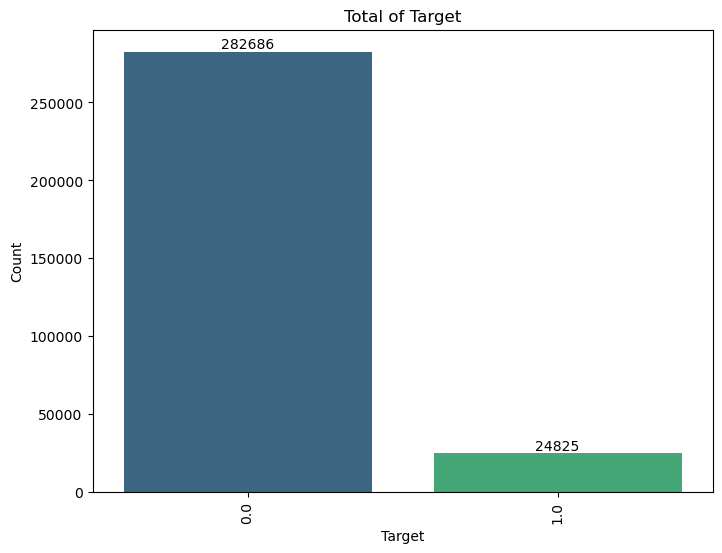

In [48]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(data_train['TARGET']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display count values on top of each bar
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Total of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [49]:
x = data_train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = data_train['TARGET']

In [50]:
x.shape

(307511, 330)

In [51]:
y.shape

(307511,)

ambil sample saja biar data balance

In [53]:
rus = RandomUnderSampler()
x_resample, y_resample = rus.fit_resample(x,y)

In [54]:
print(x_resample.shape)
print(y_resample.shape)

(49650, 330)
(49650,)


lakukan rescale data biar mudah dalam pembuatan model

In [55]:
scaler = MinMaxScaler()

In [56]:
x_resample = scaler.fit_transform(x_resample)

 Baseline Model Logistic Regression

In [57]:
#data testing
data_test_2 = data_test.copy()

#drop unused columns
data_test_2.drop(columns=['SK_ID_CURR', 'TARGET'], inplace=True)

#rescale
x_test = scaler.fit_transform(data_test_2)

In [58]:
log_reg = LogisticRegression(C=0.0001)

In [59]:
log_reg.fit(x_resample, y_resample)

LogisticRegression(C=0.0001)

In [60]:
y_pred = log_reg.predict_proba(x_test)[:,1]

In [61]:
submission = data_test[['SK_ID_CURR']]

In [62]:
submission['TARGET'] = y_pred

In [63]:

submission.head()

,SK_ID_CURR,TARGET
307511,100001,0.485442
307512,100005,0.531552
307513,100013,0.466850
307514,100028,0.475320
307515,100038,0.551509


In [66]:
submission.to_csv('home-credit-default-risk\\log_reg_submission.csv', index=False)

Advanced Model LightGBM

In [67]:
lgbm = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.03,
        num_leaves=34,
        colsample_bytree=0.9,
        subsample=0.8,
        max_depth=8,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=300,
        silent=-1,
        verbose=-1,
        )

In [68]:
lgbm.fit(x_resample, y_resample)

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.03, max_depth=8,
               min_child_weight=300, min_split_gain=0.01, n_estimators=10000,
               num_leaves=34, reg_alpha=0.1, reg_lambda=0.1, silent=-1,
               subsample=0.8, verbose=-1)

In [69]:
y_pred_2 = lgbm.predict_proba(x_test)[:,1]

In [70]:
submission_2 = data_test[['SK_ID_CURR']]
submission_2['TARGET'] = y_pred_2
submission_2.head()

,SK_ID_CURR,TARGET
307511,100001,0.619357
307512,100005,0.768226
307513,100013,0.072469
307514,100028,0.173089
307515,100038,0.882501


In [78]:
submission_2.to_csv('home-credit-default-risk\\lightGBM_submission.csv', index=False)

Advanced Model XGBoost

In [72]:
xgb = XGBClassifier(
        objective="binary:logistic",
        booster="gbtree",
        eval_metric = "auc",
        nthread = 4,
        eta = 0.05,
        gamma = 0,
        max_depth = 6,
        subsample=0.7,
        colsample_bytree = 0.7,
        colsample_bylevel = 0.675,
        min_child_weight = 22,
        alpha = 0,
        random_state = 42,
        nrounds = 2000
    )

In [73]:
xgb.fit(x_resample, y_resample)

[20:41:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "nrounds" } are not used.



XGBClassifier(alpha=0, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.675, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric='auc',
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=22, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              nrounds=2000, ...)

In [74]:
y_pred_3 = xgb.predict_proba(x_test)[:,1]

In [75]:
submission_3 = data_test[['SK_ID_CURR']]
submission_3['TARGET'] = y_pred_3
submission_3.head()

,SK_ID_CURR,TARGET
307511,100001,0.437404
307512,100005,0.631641
307513,100013,0.177599
307514,100028,0.262168
307515,100038,0.615681


In [77]:
submission_3.to_csv('home-credit-default-risk\\XGB_submission.csv', index=False)

# Analyst Data

In [19]:
data = import_data('home-credit-default-risk//application_train.csv')

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 59.54 MB
Decreased by 79.2%


In [20]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


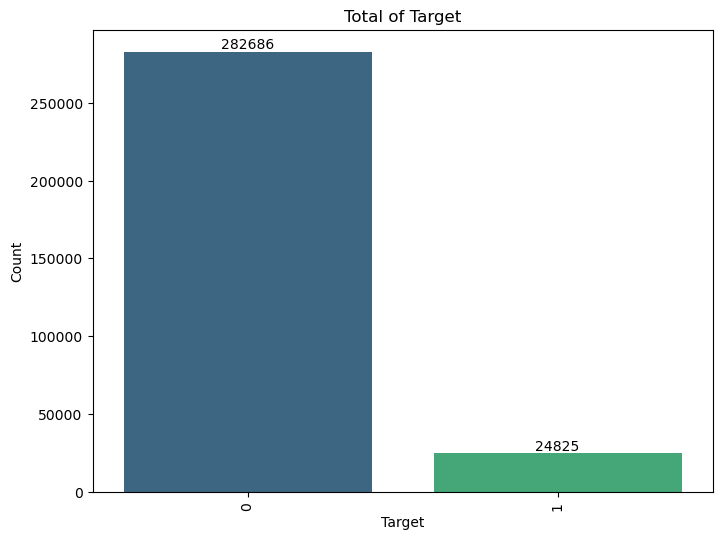

In [21]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(data['TARGET']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display count values on top of each bar
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Total of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

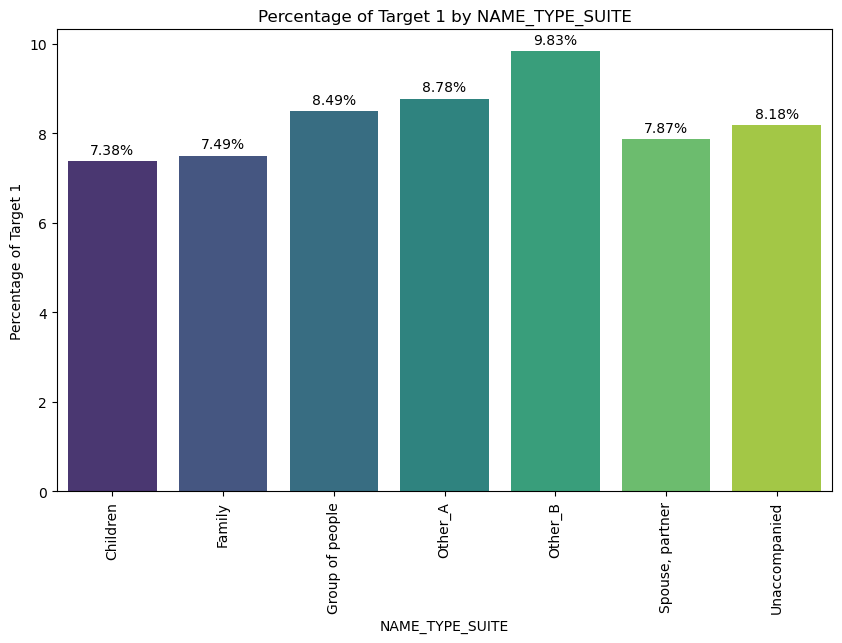

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'TARGET' is the column containing the target values and 'NAME_TYPE_SUITE' is the column for different types
# of suites
target_by_suite = data.groupby(['NAME_TYPE_SUITE', 'TARGET']).size().unstack(fill_value=0)

# Calculate the total count for each type of suite
total_by_suite = target_by_suite.sum(axis=1)

# Calculate the percentage of Target 1 within each type of suite
percentage_by_suite = (target_by_suite[1] / total_by_suite) * 100

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentage_by_suite.index, y=percentage_by_suite.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display percentage values on top of each bar
for i, v in enumerate(percentage_by_suite.values):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Target 1 by NAME_TYPE_SUITE')
plt.xlabel('NAME_TYPE_SUITE')
plt.ylabel('Percentage of Target 1')

plt.show()


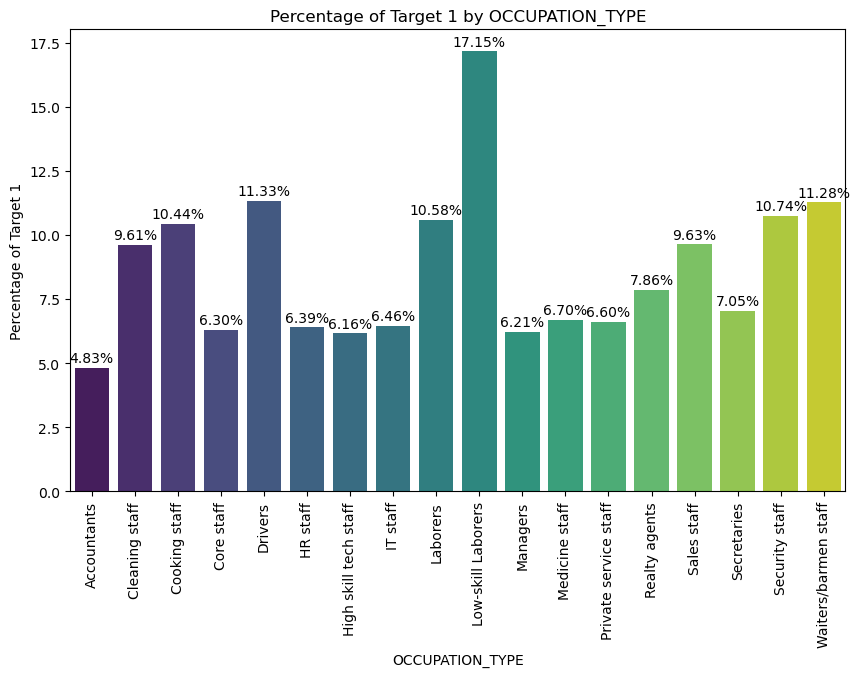

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'TARGET' is the column containing the target values and 'OCCUPATION_TYPE' is the column for different types
# of suites
target_by_suite = data.groupby(['OCCUPATION_TYPE', 'TARGET']).size().unstack(fill_value=0)

# Calculate the total count for each type of suite
total_by_suite = target_by_suite.sum(axis=1)

# Calculate the percentage of Target 1 within each type of suite
percentage_by_suite = (target_by_suite[1] / total_by_suite) * 100

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentage_by_suite.index, y=percentage_by_suite.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display percentage values on top of each bar
for i, v in enumerate(percentage_by_suite.values):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Target 1 by OCCUPATION_TYPE')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Percentage of Target 1')

plt.show()


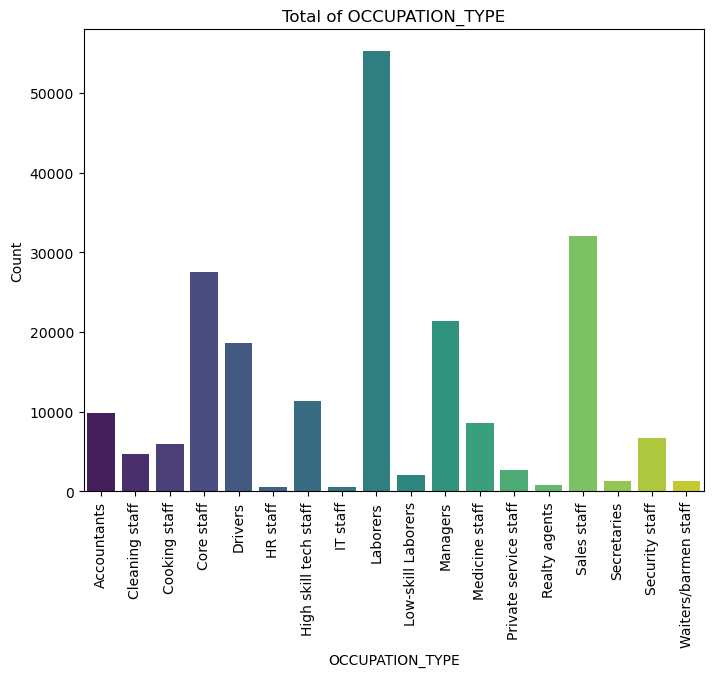

In [36]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(data['OCCUPATION_TYPE']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display count values on top of each bar



plt.title('Total of OCCUPATION_TYPE')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Count')
plt.show()

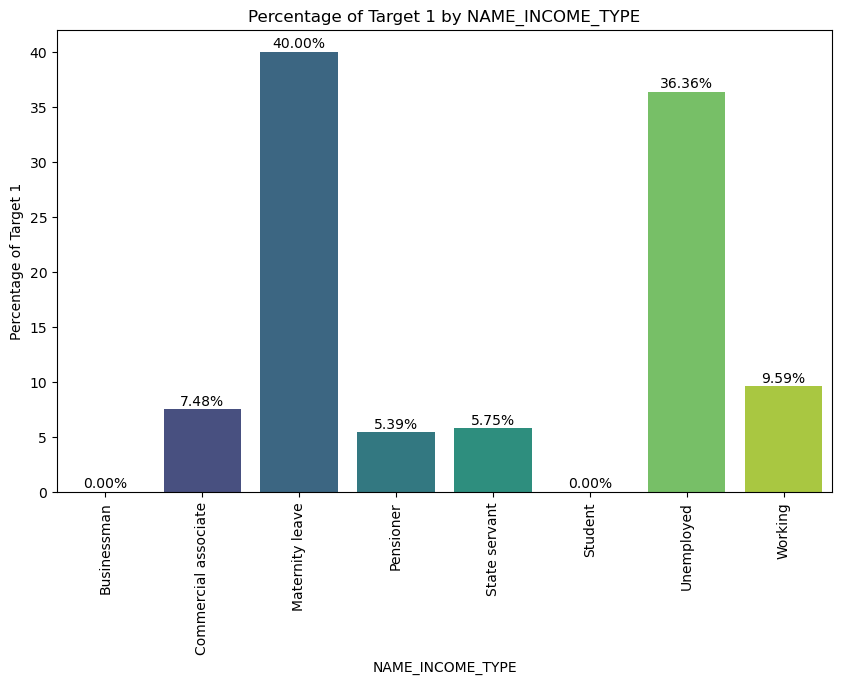

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'TARGET' is the column containing the target values and 'NAME_INCOME_TYPE' is the column for different types
# of suites
target_by_suite = data.groupby(['NAME_INCOME_TYPE', 'TARGET']).size().unstack(fill_value=0)

# Calculate the total count for each type of suite
total_by_suite = target_by_suite.sum(axis=1)

# Calculate the percentage of Target 1 within each type of suite
percentage_by_suite = (target_by_suite[1] / total_by_suite) * 100

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentage_by_suite.index, y=percentage_by_suite.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display percentage values on top of each bar
for i, v in enumerate(percentage_by_suite.values):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Target 1 by NAME_INCOME_TYPE')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Percentage of Target 1')

plt.show()


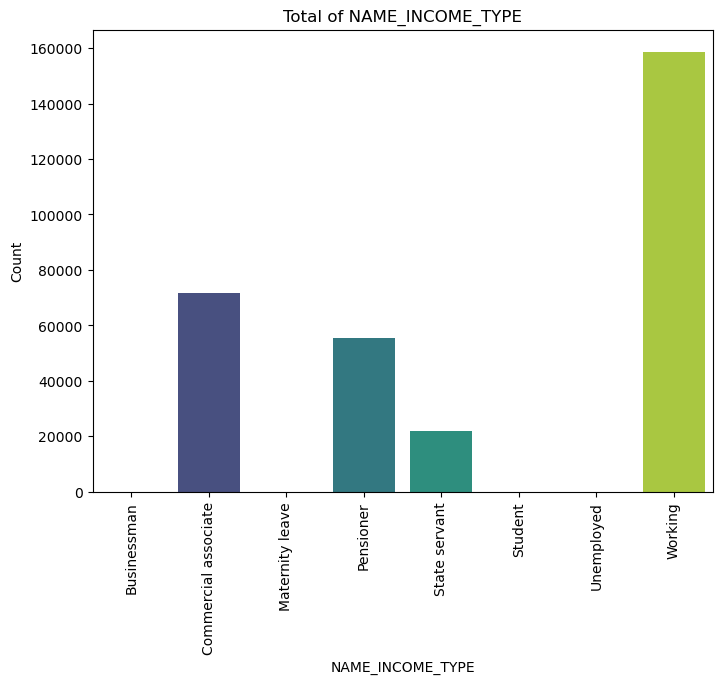

In [40]:

# Count occurrences of each sentiment
sentiment_counts = pd.Series(data['NAME_INCOME_TYPE']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display count values on top of each bar
# for i, count in enumerate(sentiment_counts.values):
#     ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Total of NAME_INCOME_TYPE')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Count')
plt.show()

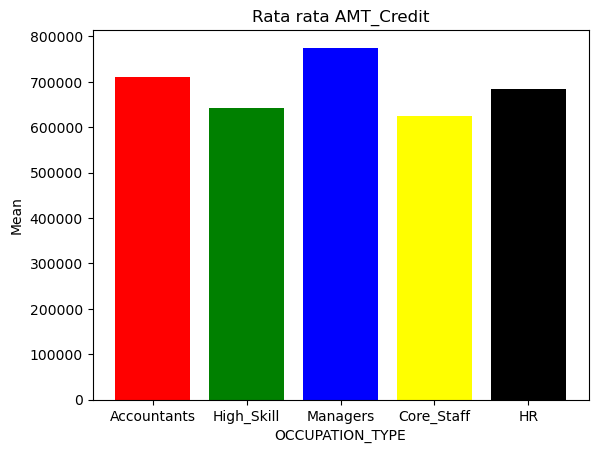

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Variabel dan Nilai
Accountants = data[data['OCCUPATION_TYPE'] == 'Accountants']['AMT_CREDIT'].mean()
High_Skill = data[data['OCCUPATION_TYPE'] == 'High skill tech staff']['AMT_CREDIT'].mean()
Managers = data[data['OCCUPATION_TYPE'] == 'Managers']['AMT_CREDIT'].mean()
Core_Staff = data[data['OCCUPATION_TYPE'] == 'Core staff']['AMT_CREDIT'].mean()
HR = data[data['OCCUPATION_TYPE'] == 'HR staff']['AMT_CREDIT'].mean()

# Label untuk variabel
labels = ['Accountants', 'High_Skill', 'Managers','Core_Staff', 'HR']

# Nilai variabel
values = [Accountants, High_Skill, Managers, Core_Staff, HR]

# Membuat diagram batang
plt.bar(labels, values, color=['red', 'green', 'blue', 'yellow', 'black'])


# Menambahkan label dan judul
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Mean')
plt.title('Rata rata AMT_Credit')

# Menampilkan diagram
plt.show()


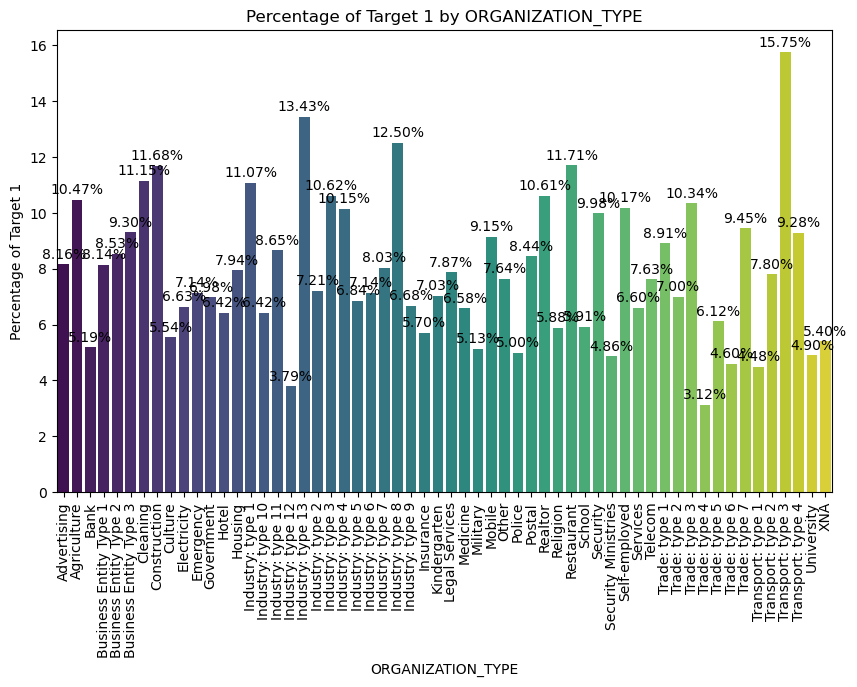

In [30]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'TARGET' is the column containing the target values and 'ORGANIZATION_TYPE' is the column for different types
# of suites
target_by_suite = data.groupby(['ORGANIZATION_TYPE', 'TARGET']).size().unstack(fill_value=0)

# Calculate the total count for each type of suite
total_by_suite = target_by_suite.sum(axis=1)

# Calculate the percentage of Target 1 within each type of suite
percentage_by_suite = (target_by_suite[1] / total_by_suite) * 100

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentage_by_suite.index, y=percentage_by_suite.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display percentage values on top of each bar
for i, v in enumerate(percentage_by_suite.values):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Target 1 by ORGANIZATION_TYPE')
plt.xlabel('ORGANIZATION_TYPE')
plt.ylabel('Percentage of Target 1')

plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features